# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
from citipy import citipy
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
from config import weather_api_key
from config import g_key

## Generate Cities List

In [24]:
random_city_df=pd.DataFrame({'longitude':(np.random.uniform(-180,180,1300)), 'latitude':(np.random.uniform(-90,90,1300))})

random_city_df.head()

cities = []

country = []

for row in range(0,len(random_city_df)):
    lat=random_city_df.iloc[row]['latitude']
    lon=random_city_df.iloc[row]['longitude']
    city=citipy.nearest_city(lat,lon)
    name=city.city_name
    cities.append(name)
    if name not in cities:
        cities.append(name)
    countrycode=city.country_code
    country.append(countrycode)
    
random_city_df['city']=cities
random_city_df['country']=country
random_city_df.head(20)
len(random_city_df)

    

1300

In [26]:
cities_df = random_city_df.drop_duplicates('city',keep='first')

len(cities_df)

cities_df['max temp']=''
cities_df['humidity']=''
cities_df['cloudiness']=''
cities_df['wind speed']=''
cities_df['date']=''
cities_df.head(10)


C:\Users\niyio\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\niyio\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\niyio\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,longitude,latitude,city,country,max temp,humidity,cloudiness,wind speed,date
0,146.523987,-66.830536,hobart,au,,,,,
1,-139.158067,28.788306,hilo,us,,,,,
2,-44.312927,27.095027,ribeira grande,pt,,,,,
3,-93.832129,23.680808,nuevo progreso,mx,,,,,
4,41.702622,-42.834573,margate,za,,,,,
5,80.136385,-59.670575,busselton,au,,,,,
6,-135.279124,78.845144,tuktoyaktuk,ca,,,,,
7,76.229704,6.278401,manavalakurichi,in,,,,,
8,128.736336,30.767397,kaseda,jp,,,,,
9,-96.279967,81.128103,thompson,ca,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
city_data = []
url = "http://api.openweathermap.org/data/2.5/weather?"
    



for index, row in enumerate(cities):
    query_url = f"{url}&q=%s&units=imperial&appid=%s" % (row.replace(' ','+'),weather_api_key)
    response = requests.get(query_url)
    
    response_json = response.json()

    

 
    print(f'Processing record {index}:City name is {row}')
    
    try:
        max_temp=response_json['main']['temp_max']
        
        hum=response_json['main']['humidity']
    
        city=response_json['name']
        lon=response_json['coord']['lon']
        lat=response_json['coord']['lat']
        cloud=response_json['clouds']['all']
        winspd=response_json['wind']['speed']
        count_code=response_json['sys']['country']
        date=response_json['dt']
        
        city_data.append({'City':city,'Longitude':lon,'Latitude':lat,'Max Temp':max_temp,'Humidity':hum,'Cloudiness':cloud,'Wind Speed':winspd,'Country':count_code,'Date':date})

            
    except:
        print('city weather unavilable.....skip')
    


Processing record 0:City name is hobart
Processing record 1:City name is hilo
Processing record 2:City name is ribeira grande
Processing record 3:City name is nuevo progreso
Processing record 4:City name is margate
Processing record 5:City name is busselton
Processing record 6:City name is tuktoyaktuk
Processing record 7:City name is manavalakurichi
Processing record 8:City name is kaseda
Processing record 9:City name is thompson
Processing record 10:City name is jaque
Processing record 11:City name is vardo
Processing record 12:City name is derzhavinsk
Processing record 13:City name is saskylakh
Processing record 14:City name is palabuhanratu
city weather unavilable.....skip
Processing record 15:City name is pokhara
Processing record 16:City name is mar del plata
Processing record 17:City name is rikitea
Processing record 18:City name is burnie
Processing record 19:City name is goderich
Processing record 20:City name is illoqqortoormiut
city weather unavilable.....skip
Processing reco

Processing record 181:City name is louisbourg
city weather unavilable.....skip
Processing record 182:City name is oskemen
Processing record 183:City name is waingapu
Processing record 184:City name is sovetskaya gavan
Processing record 185:City name is goderich
Processing record 186:City name is east london
Processing record 187:City name is ushuaia
Processing record 188:City name is taoudenni
Processing record 189:City name is ribeira grande
Processing record 190:City name is rikitea
Processing record 191:City name is mar del plata
Processing record 192:City name is hermanus
Processing record 193:City name is ryotsu
Processing record 194:City name is ushuaia
Processing record 195:City name is san rafael
Processing record 196:City name is diego de almagro
Processing record 197:City name is bethel
Processing record 198:City name is cape town
Processing record 199:City name is guerrero negro
Processing record 200:City name is makakilo city
Processing record 201:City name is avarua
Proces

Processing record 358:City name is butaritari
Processing record 359:City name is new norfolk
Processing record 360:City name is colon
Processing record 361:City name is broome
Processing record 362:City name is bocaranga
city weather unavilable.....skip
Processing record 363:City name is paita
Processing record 364:City name is taolanaro
city weather unavilable.....skip
Processing record 365:City name is bredy
Processing record 366:City name is alofi
Processing record 367:City name is tuktoyaktuk
Processing record 368:City name is qaanaaq
Processing record 369:City name is kruisfontein
Processing record 370:City name is fortuna
Processing record 371:City name is dharur
Processing record 372:City name is micheweni
Processing record 373:City name is fairbanks
Processing record 374:City name is isiro
Processing record 375:City name is tabou
Processing record 376:City name is jingdezhen
Processing record 377:City name is illoqqortoormiut
city weather unavilable.....skip
Processing record 3

Processing record 531:City name is atbasar
Processing record 532:City name is narasapur
Processing record 533:City name is shieli
Processing record 534:City name is brae
Processing record 535:City name is bambous virieux
Processing record 536:City name is punta arenas
Processing record 537:City name is upernavik
Processing record 538:City name is punta arenas
Processing record 539:City name is hermanus
Processing record 540:City name is maldonado
Processing record 541:City name is ormond beach
Processing record 542:City name is faanui
Processing record 543:City name is hilo
Processing record 544:City name is saleaula
city weather unavilable.....skip
Processing record 545:City name is port alfred
Processing record 546:City name is taolanaro
city weather unavilable.....skip
Processing record 547:City name is nikolskoye
Processing record 548:City name is qaanaaq
Processing record 549:City name is cidreira
Processing record 550:City name is faya
Processing record 551:City name is mataura
P

Processing record 703:City name is kawalu
Processing record 704:City name is albany
Processing record 705:City name is east london
Processing record 706:City name is constitucion
Processing record 707:City name is kapaa
Processing record 708:City name is port augusta
Processing record 709:City name is caravelas
Processing record 710:City name is hasaki
Processing record 711:City name is bredasdorp
Processing record 712:City name is isangel
Processing record 713:City name is rikitea
Processing record 714:City name is codrington
Processing record 715:City name is pierrelatte
Processing record 716:City name is tihemetsa
Processing record 717:City name is cairns
Processing record 718:City name is atuona
Processing record 719:City name is ancud
Processing record 720:City name is bethel
Processing record 721:City name is tanabe
Processing record 722:City name is jamestown
Processing record 723:City name is palabuhanratu
city weather unavilable.....skip
Processing record 724:City name is roch

Processing record 875:City name is sinnai
Processing record 876:City name is mount isa
Processing record 877:City name is luanda
Processing record 878:City name is tsumeb
Processing record 879:City name is sao filipe
Processing record 880:City name is taolanaro
city weather unavilable.....skip
Processing record 881:City name is saint-philippe
Processing record 882:City name is castro
Processing record 883:City name is rikitea
Processing record 884:City name is asau
Processing record 885:City name is salalah
Processing record 886:City name is bluff
Processing record 887:City name is rikitea
Processing record 888:City name is busselton
Processing record 889:City name is kirakira
Processing record 890:City name is shaoguan
Processing record 891:City name is amderma
city weather unavilable.....skip
Processing record 892:City name is uzunovo
Processing record 893:City name is port elizabeth
Processing record 894:City name is fortuna
Processing record 895:City name is lardos
Processing recor

Processing record 1049:City name is hobart
Processing record 1050:City name is saskylakh
Processing record 1051:City name is durazno
Processing record 1052:City name is srikakulam
Processing record 1053:City name is auki
Processing record 1054:City name is upernavik
Processing record 1055:City name is bilma
Processing record 1056:City name is airai
Processing record 1057:City name is punta arenas
Processing record 1058:City name is sunrise manor
Processing record 1059:City name is san quintin
Processing record 1060:City name is ribeira grande
Processing record 1061:City name is butaritari
Processing record 1062:City name is ushuaia
Processing record 1063:City name is east london
Processing record 1064:City name is bambous virieux
Processing record 1065:City name is washington
Processing record 1066:City name is rikitea
Processing record 1067:City name is coquimbo
Processing record 1068:City name is sitka
Processing record 1069:City name is guadalupe y calvo
Processing record 1070:City 

Processing record 1221:City name is rikitea
Processing record 1222:City name is longyearbyen
Processing record 1223:City name is port lincoln
Processing record 1224:City name is yarada
Processing record 1225:City name is port elizabeth
Processing record 1226:City name is codrington
Processing record 1227:City name is richards bay
Processing record 1228:City name is albany
Processing record 1229:City name is codrington
Processing record 1230:City name is arraial do cabo
Processing record 1231:City name is great bend
Processing record 1232:City name is pudozh
Processing record 1233:City name is kargasok
Processing record 1234:City name is buraydah
Processing record 1235:City name is albany
Processing record 1236:City name is cape town
Processing record 1237:City name is vao
Processing record 1238:City name is mar del plata
Processing record 1239:City name is cidreira
Processing record 1240:City name is attawapiskat
city weather unavilable.....skip
Processing record 1241:City name is fevr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:


cities_df=pd.DataFrame(city_data)

cities_df.to_csv('cities_weather.csv')

cities_df['Max Temp']= pd.to_numeric(cities_df['Max Temp'], errors='coerce')
cities_df['Humidity']= pd.to_numeric(cities_df['Humidity'], errors='coerce')
cities_df['Cloudiness']= pd.to_numeric(cities_df['Cloudiness'], errors='coerce')
cities_df['Wind Speed']= pd.to_numeric(cities_df['Wind Speed'], errors='coerce')

cities_df.head(20)

,City,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,147.3294,-42.8794,89.01,29,100,16.11,AU,1613717991
1,Hilo,-155.0900,19.7297,71.60,78,1,4.61,US,1613717992
2,Ribeira Grande,-28.7000,38.5167,57.97,70,100,31.61,PT,1613717992
3,Nuevo Progreso,-97.9500,23.1667,46.99,57,40,8.99,MX,1613717993
4,Margate,1.3862,51.3813,44.01,84,100,4.00,GB,1613717993
5,Busselton,115.3333,-33.6500,75.00,46,0,3.00,AU,1613717994
6,Tuktoyaktuk,-133.0374,69.4541,-18.40,76,90,9.22,CA,1613717995
7,Manavālakurichi,77.3000,8.1333,87.80,66,20,3.13,IN,1613717995
8,Kaseda-shirakame,130.3167,31.4167,51.80,50,20,17.27,JP,1613717996
9,Thompson,-97.8558,55.7435,-13.00,84,20,5.39,CA,1613717885


In [29]:
cities_df.describe()

,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1.201000e+03
mean,4.440521,5.943414,51.801699,72.460450,56.892590,8.674055,1.613718e+09
std,103.106208,40.566370,32.297288,19.712567,40.185789,6.083025,2.357956e+02
min,-175.200000,-54.800000,-33.110000,9.000000,0.000000,0.510000,1.613718e+09
25%,-73.820300,-33.590600,35.600000,65.000000,13.000000,3.910000,1.613718e+09
50%,10.000000,2.771700,62.600000,77.000000,75.000000,6.910000,1.613718e+09
75%,102.265500,42.600100,76.950000,86.000000,96.000000,12.100000,1.613718e+09
max,178.416700,78.218600,100.990000,100.000000,100.000000,36.860000,1.613719e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

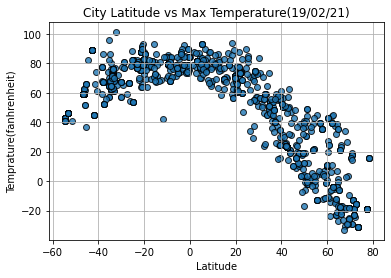

In [68]:
plt.scatter(cities_df['Latitude'],cities_df['Max Temp'], edgecolor='black', linewidths=1,marker='o', alpha=0.8, label='Cities')

plt.title('City Latitude vs Max Temperature(19/02/21)')
plt.ylabel('Temprature(fanhrenheit)')
plt.xlabel('Latitude')
plt.grid('True')
plt.savefig('Max-Temp_vs_Latitude.png')
plt.show()

## Latitude vs. Humidity Plot

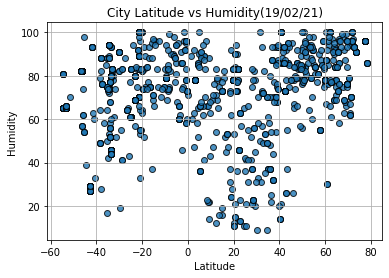

In [47]:
plt.scatter(cities_df['Latitude'],cities_df['Humidity'], edgecolor='black', linewidths=1,marker='o', alpha=0.8, label='Cities')

plt.title('City Latitude vs Humidity(19/02/21)')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid('True')
plt.savefig('Humidity_vs_Latitude.png')
plt.show()

## Latitude vs. Cloudiness Plot

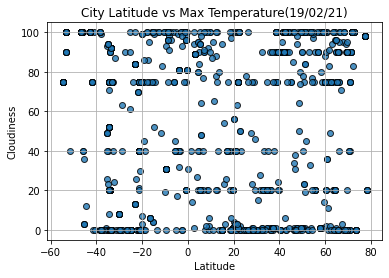

In [48]:
plt.scatter(cities_df['Latitude'],cities_df['Cloudiness'], edgecolor='black', linewidths=1,marker='o', alpha=0.8, label='Cities')

plt.title('City Latitude vs Max Temperature(19/02/21)')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid('True')
plt.savefig('Cloudiness_vs_Latitude.png')
plt.show()

## Latitude vs. Wind Speed Plot

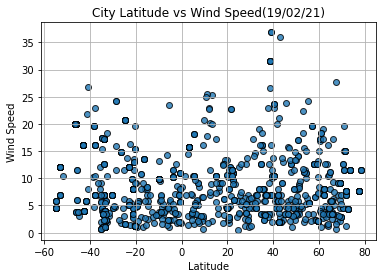

In [49]:
plt.scatter(cities_df['Latitude'],cities_df['Wind Speed'], edgecolor='black', linewidths=1,marker='o', alpha=0.8, label='Cities')

plt.title('City Latitude vs Wind Speed(19/02/21)')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid('True')
plt.savefig('Wind_Speed_vs_Latitude.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.7045103490601804


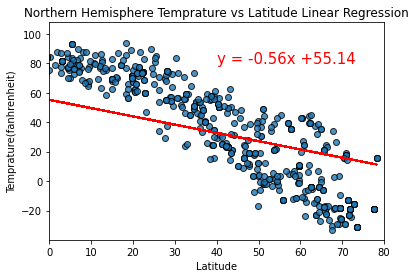

In [60]:
from scipy.stats import linregress

from sklearn import datasets

x_values = cities_df['Latitude']
y_values = cities_df['Max Temp']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)

r_values = x_values * slope + intercept

line_eq ='y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.scatter(cities_df['Latitude'],cities_df['Max Temp'], edgecolor='black', linewidths=1,marker='o', alpha=0.8, label='Cities')
plt.plot(x_values, r_values,'r')
plt.annotate(line_eq,(40,80),fontsize=15,color='r')

plt.xlim(0,80)

plt.title('Northern Hemisphere Temprature vs Latitude Linear Regression')
plt.ylabel('Temprature(fanhrenheit)')
plt.xlabel('Latitude')

plt.savefig('NH_LR_Temp_vs_Latitude.png')
print(f'The r-value is : {rvalue}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.7045103490601804


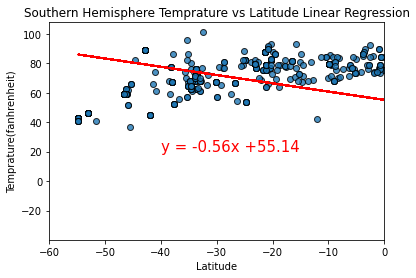

In [61]:
x_values = cities_df['Latitude']
y_values = cities_df['Max Temp']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)

r_values = x_values * slope + intercept

line_eq ='y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.scatter(cities_df['Latitude'],cities_df['Max Temp'], edgecolor='black', linewidths=1,marker='o', alpha=0.8, label='Cities')
plt.plot(x_values, r_values,'r')
plt.annotate(line_eq,(-40,20),fontsize=15,color='r')

plt.xlim(-60,0)

plt.title('Southern Hemisphere Temprature vs Latitude Linear Regression')
plt.ylabel('Temprature(fanhrenheit)')
plt.xlabel('Latitude')

plt.savefig('STH_Linear_reg_Temp_vs_Latitude.png')
print(f'The r-value is : {rvalue}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.19158782978075667


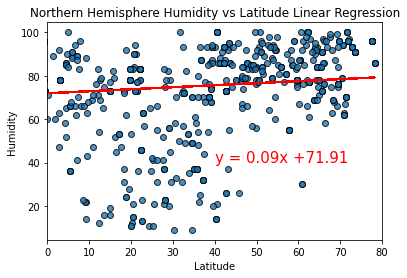

In [64]:
x_values = cities_df['Latitude']
y_values = cities_df['Humidity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)

r_values = x_values * slope + intercept

line_eq ='y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.scatter(cities_df['Latitude'],cities_df['Humidity'], edgecolor='black', linewidths=1,marker='o', alpha=0.8, label='Cities')
plt.plot(x_values, r_values,'r')
plt.annotate(line_eq,(40,40),fontsize=15,color='r')

plt.xlim(0,80)

plt.title('Northern Hemisphere Humidity vs Latitude Linear Regression')
plt.ylabel('Humidity')
plt.xlabel('Latitude')

plt.savefig('NH-LR-Humidity_vs_Latitude.png')
print(f'The r-value is : {rvalue}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.19158782978075667


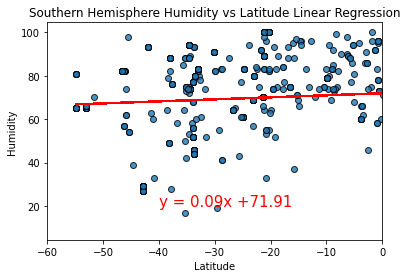

In [65]:
x_values = cities_df['Latitude']
y_values = cities_df['Humidity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)

r_values = x_values * slope + intercept

line_eq ='y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.scatter(cities_df['Latitude'],cities_df['Humidity'], edgecolor='black', linewidths=1,marker='o', alpha=0.8, label='Cities')
plt.plot(x_values, r_values,'r')
plt.annotate(line_eq,(-40,20),fontsize=15,color='r')

plt.xlim(-60,0)

plt.title('Southern Hemisphere Humidity vs Latitude Linear Regression')
plt.ylabel('Humidity')
plt.xlabel('Latitude')

plt.savefig('SH_LR_Humidity_vs_Latitude.png')
print(f'The r-value is : {rvalue}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : -0.028004740227746537


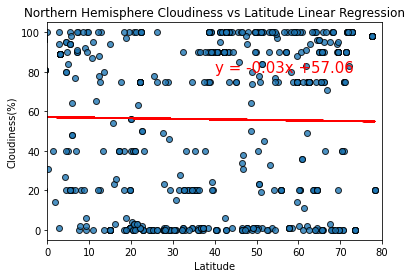

In [67]:
x_values = cities_df['Latitude']
y_values = cities_df['Cloudiness']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)

r_values = x_values * slope + intercept

line_eq ='y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.scatter(cities_df['Latitude'],cities_df['Cloudiness'], edgecolor='black', linewidths=1,marker='o', alpha=0.8, label='Cities')
plt.plot(x_values, r_values,'r')
plt.annotate(line_eq,(40,80),fontsize=15,color='r')

plt.xlim(0,80)

plt.title('Northern Hemisphere Cloudiness vs Latitude Linear Regression')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')

plt.savefig('NH_LR_Cloudiness_vs_Latitude.png')
print(f'The r-value is : {rvalue}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : -0.028004740227746537


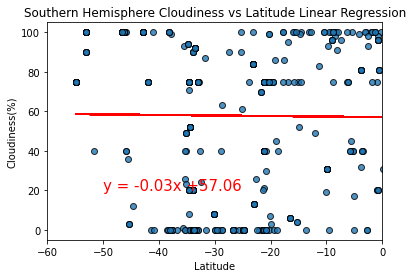

In [69]:
x_values = cities_df['Latitude']
y_values = cities_df['Cloudiness']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)

r_values = x_values * slope + intercept

line_eq ='y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.scatter(cities_df['Latitude'],cities_df['Cloudiness'], edgecolor='black', linewidths=1,marker='o', alpha=0.8, label='Cities')
plt.plot(x_values, r_values,'r')
plt.annotate(line_eq,(-50,20),fontsize=15,color='r')

plt.xlim(-60,0)

plt.title('Southern Hemisphere Cloudiness vs Latitude Linear Regression')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')

plt.savefig('SH-LR-Cloudiness_vs_Latitude.png')
print(f'The r-value is : {rvalue}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.08412531600268829


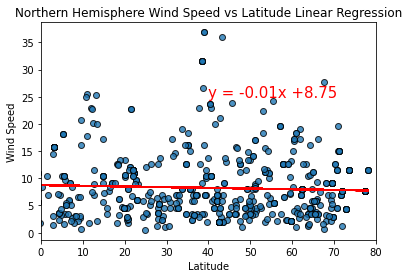

In [71]:
x_values = cities_df['Latitude']
y_values = cities_df['Wind Speed']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)

r_values = x_values * slope + intercept

line_eq ='y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.scatter(cities_df['Latitude'],cities_df['Wind Speed'], edgecolor='black', linewidths=1,marker='o', alpha=0.8, label='Cities')
plt.plot(x_values, r_values,'r')
plt.annotate(line_eq,(40,25),fontsize=15,color='r')

plt.xlim(0,80)

plt.title('Northern Hemisphere Wind Speed vs Latitude Linear Regression')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

plt.savefig('NH_LR_Wind_Speed_vs_Latitude.png')
print(f'The r-value is : {rvalue}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.08412531600268829


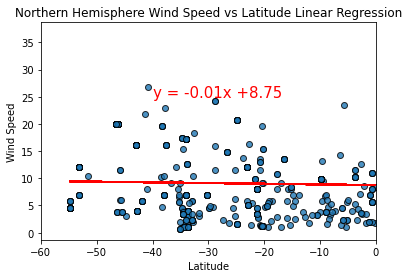

In [72]:
x_values = cities_df['Latitude']
y_values = cities_df['Wind Speed']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)

r_values = x_values * slope + intercept

line_eq ='y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.scatter(cities_df['Latitude'],cities_df['Wind Speed'], edgecolor='black', linewidths=1,marker='o', alpha=0.8, label='Cities')
plt.plot(x_values, r_values,'r')
plt.annotate(line_eq,(-40,25),fontsize=15,color='r')

plt.xlim(-60,0)

plt.title('Northern Hemisphere Wind Speed vs Latitude Linear Regression')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

plt.savefig('SH_LR_Wind_Speed_vs_Latitude.png')
print(f'The r-value is : {rvalue}')
plt.show()